# Basics on Python and Quantum Computing
###### By: J. A. Orduz-Ducuara

## Regression with data!

To measure the elapsed time. 

In [1]:
import time 

In [2]:
start_time = time.time()

In [3]:
from platform import python_version
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data

In [4]:
df_sgnl=pd.read_csv("data/data2.csv")
type(df_sgnl)

pandas.core.frame.DataFrame

In [5]:
n_samples=500
np_Array_signal = df_sgnl[0:n_samples].to_numpy()
type(np_Array_signal)

numpy.ndarray

In [6]:
t_0_pT=np_Array_signal[:,[0,1]] # h_tt_pT, h_tt_eta

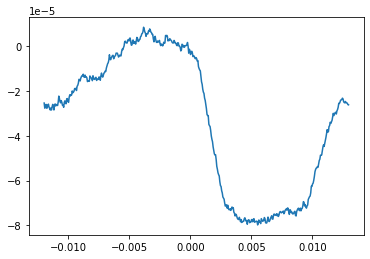

In [7]:
plt.plot(np.array(t_0_pT[:,[0]]),np.array(t_0_pT[:,[1]])) 
plt.show()

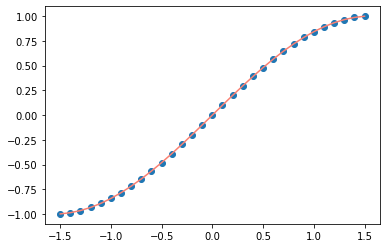

In [8]:
samples = 500
size = 1.5
step = 1E-1
xs = t_0_pT[:,[0]]
ys = t_0_pT[:,[1]] 

def f(x):
    return  np.sin(x)
#    return  x + 1

xs = np.arange(-size, size + step, step)
ys = list(map(f,xs))

plt.plot(xs,ys, color = "salmon")
plt.scatter(xs,ys)


We implement two single gates:

\begin{equation}
R_Y = 
e^{-i\phi\sigma_x/2}=
\begin{pmatrix}
\cos{\phi/2}& -i \sin{\phi/2}\\
-i\sin{\phi/2} & \cos{\phi/2}
\end{pmatrix}
\end{equation}

We used $U_3$ gate, it is associated to single-qubit rotation $,R(\delta, \theta, -\delta),$ and phase shift given by $R_\phi(\phi+\delta).$
\begin{equation}
U_3(\theta, \phi, \delta) = R_\phi(\phi+\delta) R(\delta, \theta, -\delta) = 
\begin{pmatrix}
\cos{\theta/2}& -e^{i \delta} \sin{\theta/2}\\
e^{i \phi} \sin{\theta/2} & e^{i (\phi + \delta)} \cos{\theta/2}
\end{pmatrix}
\end{equation}
where $\theta$ is the polar angle, $\phi$ labels azimuthal angle, and $\delta$ is a quantum phase.

In [9]:
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)
def circuit(theta0, x):
    qml.RY(theta0*x, wires = 0)
    qml.U3(theta0,x,np.pi, wires = 0)
    return qml.expval(qml.PauliZ(wires = 0))

def q_model(theta0, theta1, theta2, x):
    return circuit(theta0, x) * theta1 + theta2

def q_error(theta0, theta1, theta2):
    er = 0
    for x, y in zip(xs, ys):
        er += (q_model(theta0, theta1, theta2, x) - y) ** 2
    return np.sqrt(er) / len(xs)

In [15]:
print(qml.draw(circuit)(0.2, 0.5)) # random numbers

0: ──RY(0.10)──U3(0.20,0.50,3.14)─┤  <Z>


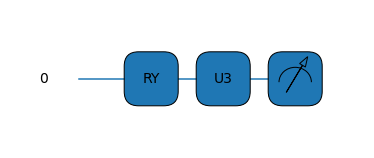

In [16]:
import matplotlib.pyplot as plt
fig, ax = qml.draw_mpl(circuit)(0.2,0.5)
plt.show()

In [12]:
theta0, theta1, theta2 = np.random.rand(3)
gradient_fn_theta = qml.grad(q_error, argnum = [0,1,2])

lr = 0.1

for epoch in range(101):
    gradiente = gradient_fn_theta(theta0, theta1, theta2)
    theta0 = theta0 - lr*gradiente[0] 
    theta1 = theta1 - lr*gradiente[1]
    theta2 = theta2 - lr*gradiente[2] 
    if epoch % 20 == 0:
        print("epoch", epoch, "loss", q_error(theta0, theta1, theta2),"Time",time.strftime("%H:%M:%S",time.gmtime(time.time() - start_time)))
        

epoch 0 loss 0.15149951919867477 Time 00:00:03
epoch 20 loss 0.09681307919819725 Time 00:00:06
epoch 40 loss 0.06319439329144023 Time 00:00:09
epoch 60 loss 0.0360543241292877 Time 00:00:12
epoch 80 loss 0.026165487801314793 Time 00:00:15
epoch 100 loss 0.02441754899419944 Time 00:00:19


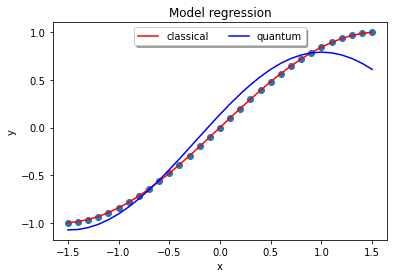

In [13]:
def q_solution(x):
    return circuit(theta0, x) * theta1 + theta2

ys2 = list(map(q_solution, xs))


plt.plot(xs,ys, color = "red", label = "classical")
plt.plot(xs, ys2, "blue", label = "quantum")
plt.scatter(xs,ys)
plt.ylabel("y")
plt.xlabel("x")
plt.title('Model regression')
plt.legend(loc='upper center', ncol=2, shadow=True)
plt.savefig('figs/RegreFuncTwogates.png', format='png',bbox_inches='tight',dpi=400)
plt.show()

# Versions

In [14]:
print("python version: ", python_version())
print("pennylane version: ", qml.__version__)

python version:  3.7.9
pennylane version:  0.23.1


# References


1. Qiskit tutorial: https://tinyurl.com/y6mh4bq8